     Average Relative Conc. [-]  Temperature [K]        Time (s)
0                      0.023590              373        1.000000
1                      0.023629              373        1.778279
2                      0.023700              373        3.162278
3                      0.023825              373        5.623413
4                      0.024046              373       10.000000
..                          ...              ...             ...
120                    0.680346              423   100000.000000
121                    0.825430              423   177827.941004
122                    0.939797              423   316227.766017
123                    0.990925              423   562341.325190
124                    0.999686              423  1000000.000000

[125 rows x 3 columns]


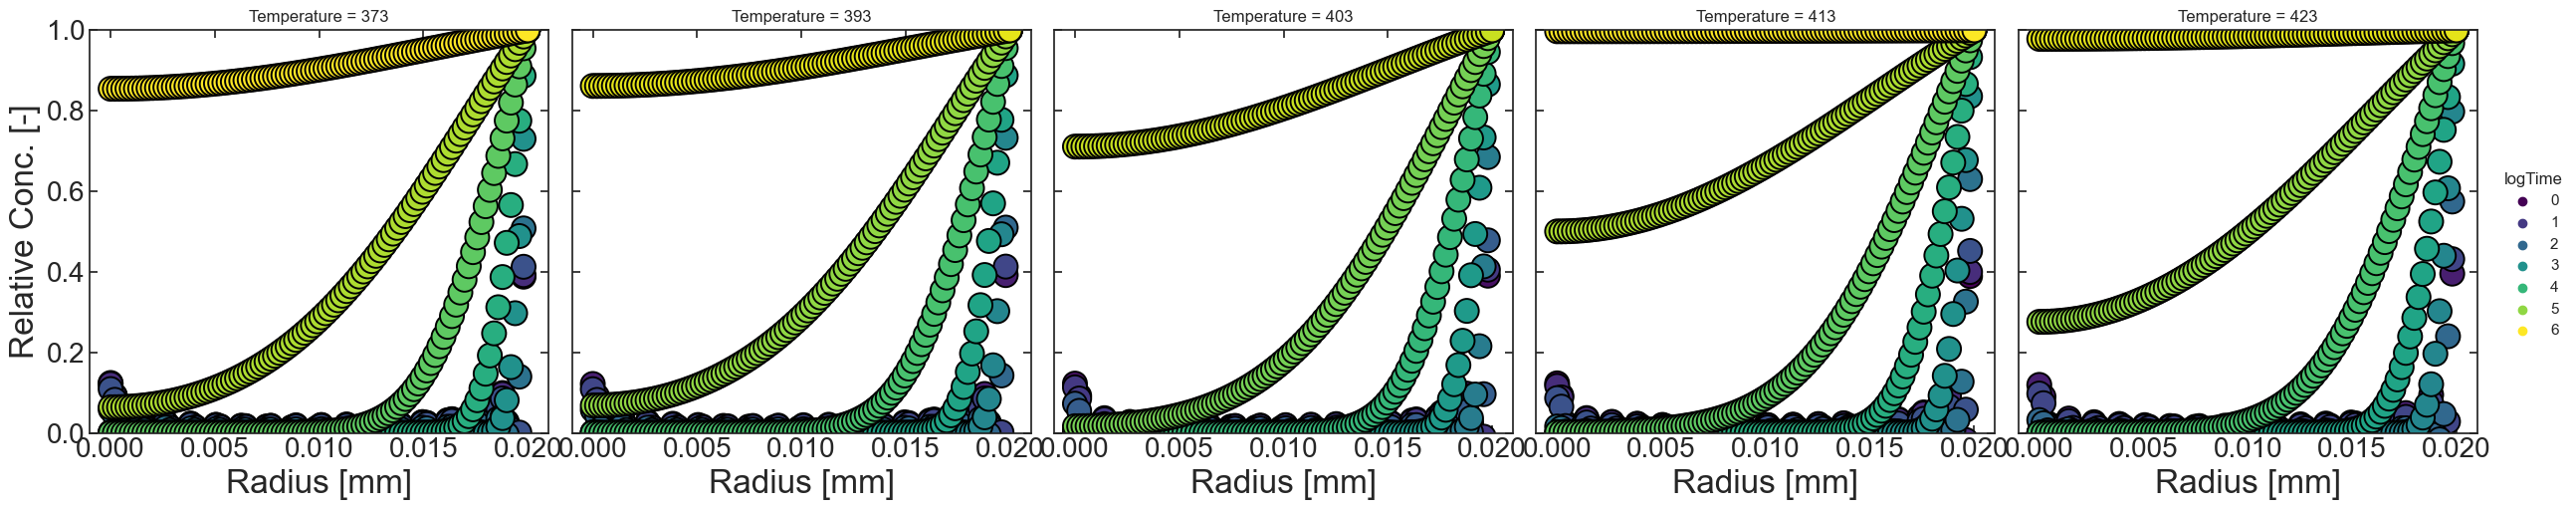

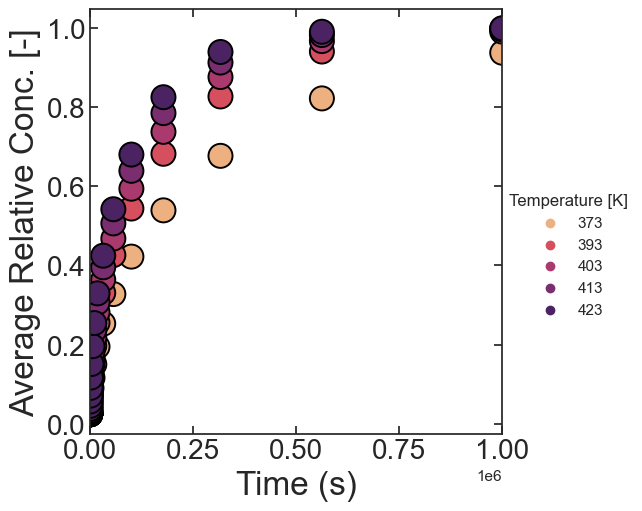

In [1]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################


#Variables
R = 20e-3#mm
RadialResolution = 100
r = np.linspace(0,R,100)
RadialSpace = R/RadialResolution
#print(r)
Temperatures = [100,120,130,140,150]
#D is dependent on temperature, below is a placeholder
#D = 1.1e-5
Co = 1
Times = np.logspace(0,6,25)

#[0.01,10,100,1000,10000,100000,1000000]
numberofZeroes = 32
ZerosOfB = spe.jn_zeros(0, numberofZeroes)



avgValList = []
n = 0
dflist = []
for T in Temperatures:
    Temp1 = T+273
    Diff = (1.820*10**-14)*Temp1**2 - (7.17266*10**-12)*Temp1 + (3.09293*10**-10)
    D= Diff
    #print(D)
    for t in Times:
        Clist = []
        for r1 in r:
            Besselpart = 1-2*(spe.jv(0,ZerosOfB*r1/R)/(ZerosOfB*spe.jv(1,ZerosOfB))*np.exp(-ZerosOfB**2*D*t/R**2)).sum()
            
            Clist.append(Besselpart)
        rbessle =  np.multiply( np.asarray(Clist),np.asarray(r))*RadialSpace
        
        averageVal = 2*rbessle.sum()/R**2
        
        avgValList.append((averageVal,Temp1,t))
        
        #print([r,Clist])
        df1 = pd.DataFrame(zip(list(r),Clist), columns = ["radius", "Relative concentration"])
        df1["Time (s)"] = t
        df1["Temperature"] = Temp1
        if n%3 == 0:
            dflist.append(df1)
        n += 1
FullDF = pd.concat(dflist).reset_index()
#print(FullDF)
FullDF["logTime"] = np.log10(FullDF["Time (s)"] )

ConcDf = pd.DataFrame(avgValList, columns = ["Average Relative Conc. [-]","Temperature [K]", "Time (s)"])
print(ConcDf)

a1 = sns.relplot(
    data=FullDF, kind = "scatter", col = "Temperature" ,
    x="radius", y="Relative concentration",  hue= "logTime",  palette = "viridis",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(0.0,1)) 
a1.set_axis_labels("Radius [mm]", "Relative Conc. [-]",fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        

plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/Larger.png", dpi = 800)

a2 = sns.relplot(
    data=ConcDf, kind = "scatter", hue = "Temperature [K]" ,
    x="Time (s)", y="Average Relative Conc. [-]",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );

for ax in a2.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
a2.set_axis_labels("Time (s)", "Average Relative Conc. [-]",fontsize = 24)
a2.set(xlim=(0.0,1000000)) 
a2.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/Smaller.png", dpi = 800)
#a2.set(xscale="log")   

In [10]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

path = "I:\My Drive\Research\OtherProjects\HiPressure\SolutibiltyPolystyreneWith.xlsx"
DataForPS = pd.read_excel(path)
print(DataForPS)
DataForPS["Pressure [MPa]"] = DataForPS["Pressure"]





a1 = sns.relplot(
    data=DataForPS, kind = "scatter", style = "Pressure [MPa]",
    x="Temperature", y="Solubility",  hue= "Pressure [MPa]",  palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(xlim=(350,500)) 
a1.set_axis_labels("Temperature [K]", "Solubility [g/kg]",fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        

plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/SolubilityPS.png", dpi = 800)

    Storage modulus  Loss modulus  Tan(delta)  Angular frequency  \
0          0.033337      0.017911    0.537276          99.974300   
1          0.027998      0.016820    0.600774          63.094500   
2          0.023133      0.015244    0.658993          39.811300   
3          0.018779      0.013659    0.727359          25.121500   
4          0.014984      0.011999    0.800816          15.850000   
5          0.011727      0.010328    0.880750          10.000500   
6          0.009017      0.008691    0.963794           6.309450   
7          0.006835      0.007158    1.047370           3.981130   
8          0.005129      0.005812    1.133300           2.511890   
9          0.003794      0.004622    1.218290           1.584900   
10         0.002786      0.003622    1.299950           1.000000   
11         0.002034      0.002812    1.382860           0.630957   
12         0.001472      0.002159    1.466520           0.398107   
13         0.001064      0.001661    1.560360   

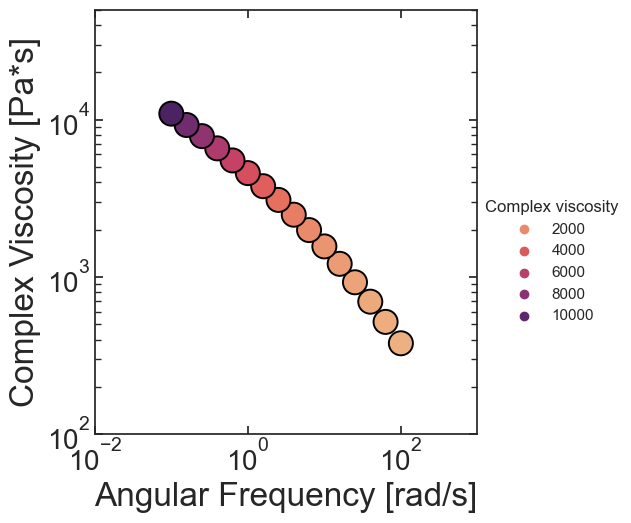

In [22]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

path = "I:\My Drive\Research\OtherProjects\HiPressure/35CData.xlsx"
DataForPS = pd.read_excel(path)
print(DataForPS)







a1 = sns.relplot(
    data=DataForPS, kind = "scatter", hue = "Complex viscosity",
    x="Angular frequency", y="Complex viscosity",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(100,50000)) 
a1.set(xlim=(0.01,1000)) 
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)



     Angular Frequency  Complex viscosity  Temperature  Pressure
0                0.100           4476.600          100        60
1                0.132           3989.700          100        60
2                0.173           3626.900          100        60
3                0.228           3344.100          100        60
4                0.300           3106.300          100        60
..                 ...                ...          ...       ...
435             55.500             87.627          150         0
436             73.100             81.546          150         0
437             96.200             73.258          150         0
438            127.000             67.673          150         0
439            167.000             62.248          150         0

[440 rows x 4 columns]


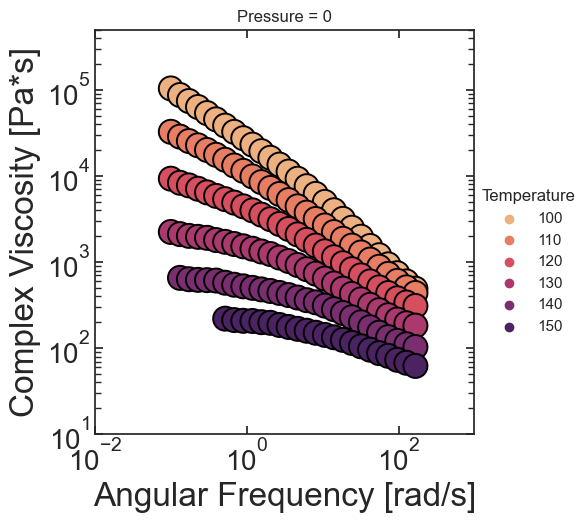

In [18]:
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
from scipy.optimize import curve_fit

#########################################################################################  #########################################################################################




path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/CombinedDataPS.xlsx"
DataForPSRheo = pd.read_excel(path, header = [0])
print(DataForPSRheo)

DataForPSRheo = DataForPSRheo.drop(DataForPSRheo[(DataForPSRheo['Pressure'] == 60 ) ].index)
DataForPSRheo = DataForPSRheo.drop(DataForPSRheo[(DataForPSRheo['Pressure'] == 80 ) ].index)

initVals = [1,1]







a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Temperature", col = "Pressure",
    x="Angular Frequency", y="Complex viscosity",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(10,500000)) 
a1.set(xlim=(0.01,1000)) 
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)

    Temperature (K)  Pressure (MPa)  Solubility  From
0            373.15           2.068       12.74  Sato
1            373.15           2.627       16.13  Sato
2            373.15           4.093       25.29  Sato
3            373.15           4.629       28.71  Sato
4            373.15           6.038       37.53  Sato
..              ...             ...         ...   ...
86           363.00           0.000        0.00   NaN
87           353.00           0.000        0.00   NaN
88           343.00           0.000        0.00   NaN
89           333.00           0.000        0.00   NaN
90           323.00           0.000        0.00   NaN

[91 rows x 4 columns]
                 Pressure (MPa)  Solubility
Temperature (K)                            
323.00                 0.000000    0.000000
333.00                 0.000000    0.000000
338.22                13.264286  107.830000
343.00                 0.000000    0.000000
353.00                 0.000000    0.000000
362.50               

C:\Users\Himendra\AppData\Local\Temp\ipykernel_3332\2392109578.py:46: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = DataForPS.groupby(["Temperature (K)"]).mean()


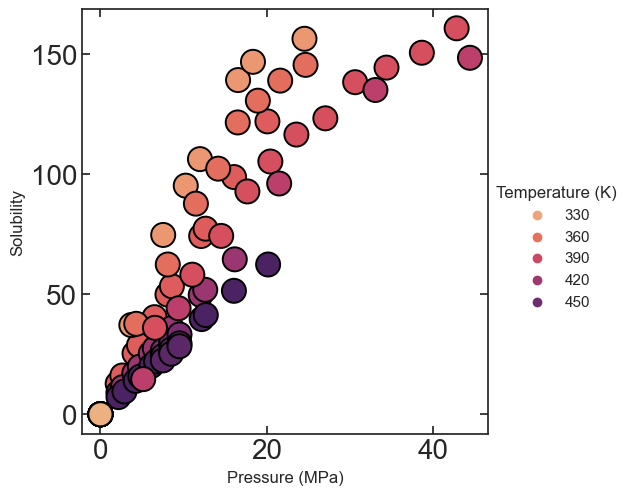

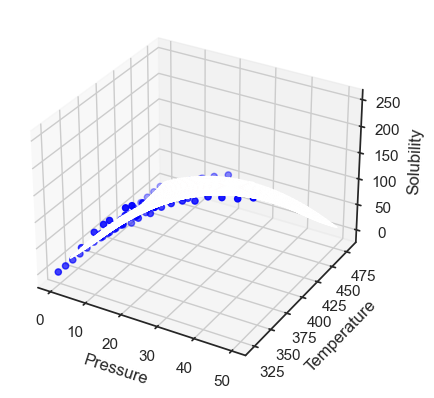

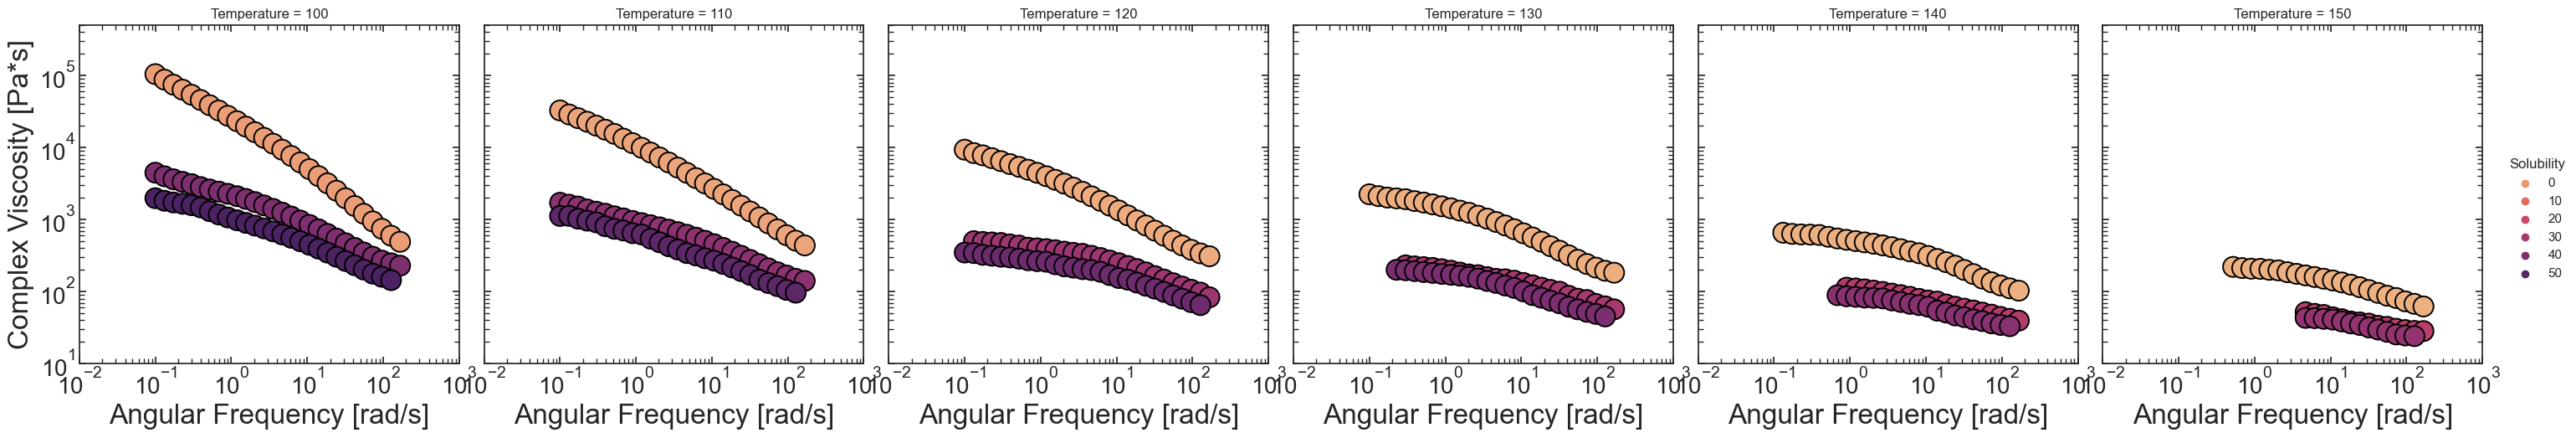

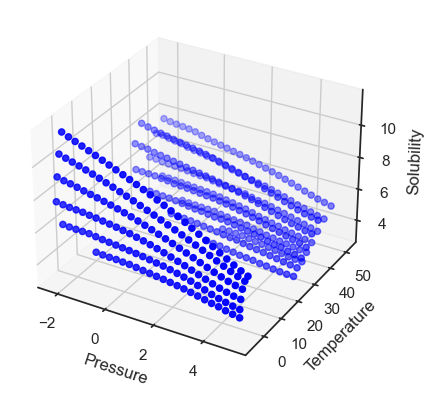

In [27]:
#analyzing CO2 data

#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################

def function(xy, a,b,c,d,e,f):
    x,y = xy
    return a+ b*x+c*y+d*x**2+e*y**2+f*x*y



path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/SolubilityPS.xlsx"
DataForPS = pd.read_excel(path, header = [0])
print(DataForPS)


UniqueTemps = DataForPS["Temperature (K)"].unique()

d = DataForPS.groupby(["Temperature (K)"]).mean()

print(d)


a1 = sns.relplot(
    data=DataForPS, kind = "scatter", hue = "Temperature (K)",
    x="Pressure (MPa)", y="Solubility",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
#a1.set(ylim=(10,500000)) 
#a1.set(xlim=(0.01,1000)) 
#a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)

        
x= DataForPS["Pressure (MPa)"]
y=DataForPS["Temperature (K)"]
z=DataForPS["Solubility"]

popt, pcov = curve_fit(function, (x, y), z)
# Print optimized parameters
print(popt)        
        
        
#a1.set(yscale="log", xscale = "log")
plt.show()

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')
x_range = np.linspace(0, 50, 50)
y_range = np.linspace(340, 480,50)
X, Y = np.meshgrid(x_range, y_range)
Z = function((X, Y), *popt)
ax.plot_surface(X,Y,Z, color='red', alpha=0.5)
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_zlabel('Solubility')
plt.show()
                      

    
path = "I:\My Drive\Research\OtherProjects\HiPressure/ML/SteadyStateDataPS/CombinedDataPS.xlsx"
DataForPSRheo = pd.read_excel(path, header = [0])
DataForPSRheo["Solubility"] = function((DataForPSRheo["Pressure"]/10, DataForPSRheo["Temperature"]+273), *popt)

a1 = sns.relplot(
    data=DataForPSRheo, kind = "scatter", hue = "Solubility", col = "Temperature",
    x="Angular Frequency", y="Complex viscosity",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(10,500000)) 
a1.set(xlim=(0.01,1000)) 
a1.set_axis_labels( "Angular Frequency [rad/s]", "Complex Viscosity [Pa*s]" ,fontsize = 24)
for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 20)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 20)
        
a1.set(yscale="log", xscale = "log")
plt.show()
a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/PressureViscosity.png", dpi = 800)








#a1.set(yscale="log", xscale = "log")

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
x = np.log(DataForPSRheo["Angular Frequency"])
y = DataForPSRheo["Solubility"]
z = np.log(DataForPSRheo["Complex viscosity"])
ax.scatter(x, y, z, color='blue')


ax.set_xlabel('Freq')
ax.set_ylabel('Solubility')
ax.set_zlabel('Viscosity')
plt.show()    
                      
#a1.savefig("I:/My Drive/Research/OtherProjects/HiPressure/RawFigs/ghjg.png", dpi = 800)

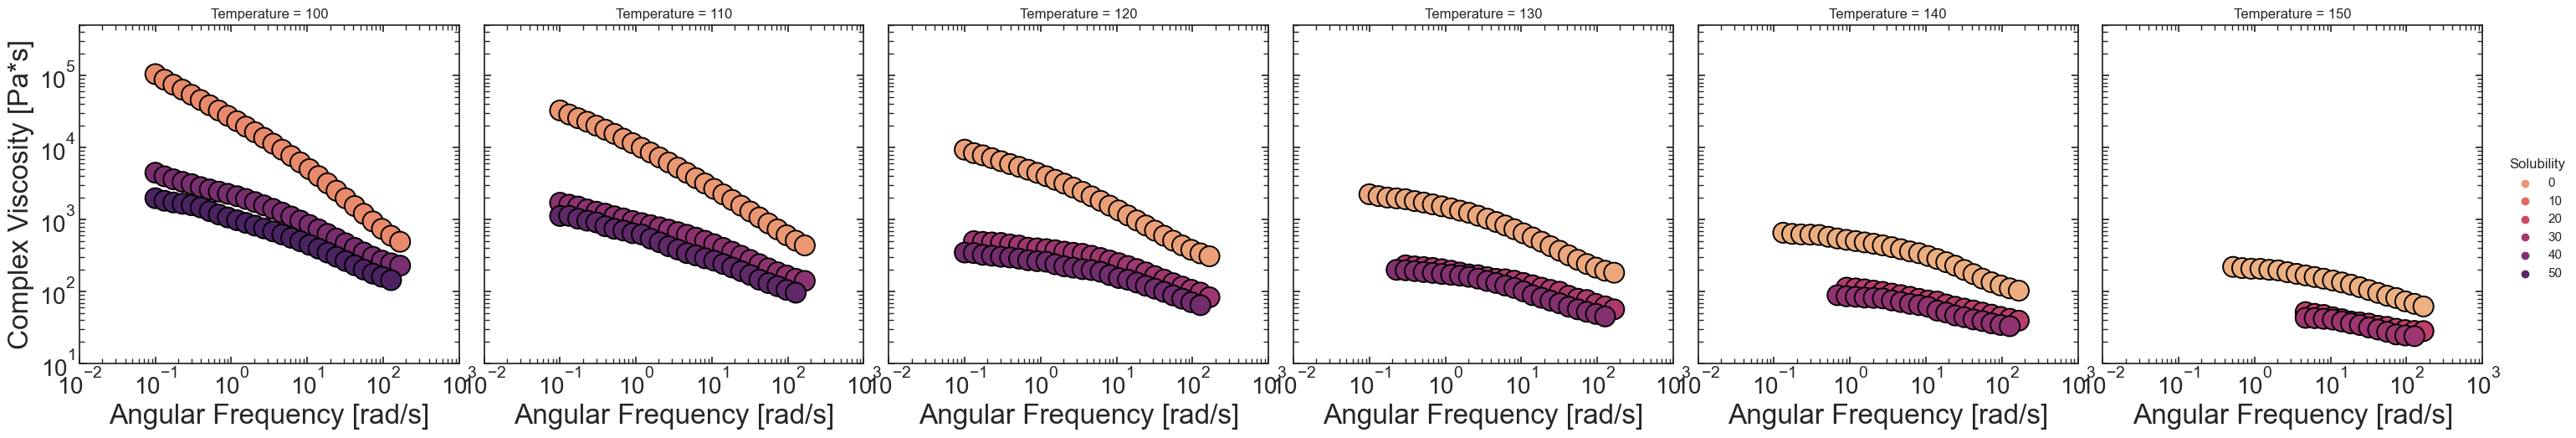

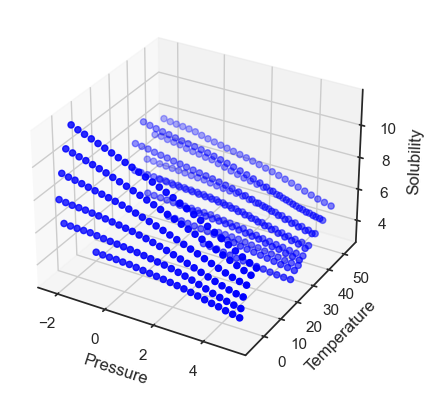